In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import packages
import requests                   
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup     
import numpy as np
from termcolor import colored

Date, Description & Score of Movie


[(' February 19, 2019', " It's a typically excellent offering from the studio, filled with big laughs and bigger feelings.", ' 5/5'), (' February 1, 2019', ' Finding Dory is a sweet tale that will have audiences cheering our blue friend on as she "just keeps swimming."', None), (' January 29, 2019', ' While it may not deliver the freshness of Finding Nemo, it is still overflowing with warmth, laughs, and genuine charm.', ' 3.5/5'), (' January 15, 2019', " The animation is crisp and the visuals are sharp as this world comes to life on the big screen. There's also a nice little message about family.", ' B'), (' December 31, 2018', ' What Finding Dory does get right is its Pixar pathos, eliciting tears at just the right moments, even when one is expecting it.', ' 3/5'), (' December 6, 2018', ' Feels more than a little familiar ... the similarities between this and its predecessor will likely make many see it as an inferior Pixar film, if there is such 

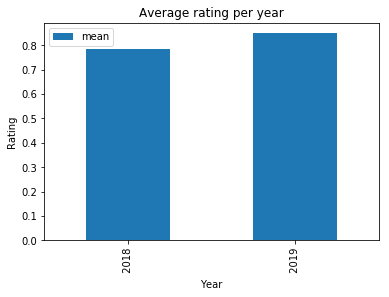

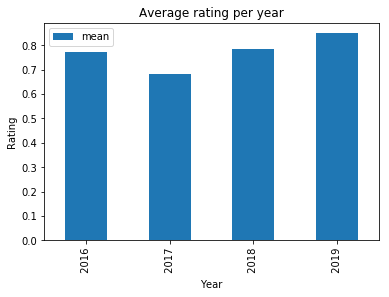

In [3]:
def getData(movie_id):
    
    str = "https://www.rottentomatoes.com/m/"+movie_id+"/reviews/"
    page = requests.get(str)

    data=[]

    # status_code 200 indicates success. 
    #a status code >200 indicates a failure 
    if page.status_code==200:        
        soup = BeautifulSoup(page.content, 'html.parser')

        divs = soup.select("div.review_table div.row")

        for idx, div in enumerate(divs):

            date = None
            description = None
            score = None

            #get date
            div_date = div.select("div.review_date")

            if div_date != []:
                date = div_date[0].get_text()

            #get description
            div_description = div.select("div.the_review")

            if div_description != []:
                description = div_description[0].get_text()

            #get score
            div_score = div.select("div.review_desc div.small.subtle")

            if div_score != []:
                score = div_score[0].get_text().split(":")
                if len(score)>1:
                    score = score[1]
                else:
                    score = None

            data.append((date,description,score))
            
        return data
    

def func(x):
    try:
        return pd.eval(x)
    except Exception:
        return None
    
def plot_data(data):
    data = pd.DataFrame(data, columns=["Date", "Description", "Score"])
    data["Year"] = data["Date"].apply(lambda x:x.split(',')[1])
    data["score"] = data['Score'].apply(func)
    bar = data.groupby('Year').score.agg([np.mean]).plot.bar(figsize = (6,4), title = "Average rating per year")
    bar.set(ylabel = "Rating", xlabel = "Year")
    
def getFullData(movie_id):
    str_1 = "https://www.rottentomatoes.com/m/"+movie_id+"/reviews/?page=1&sort="
    page = requests.get(str_1)

    data=[]
    reviews = 0
    pages = 0
    if page.status_code==200:        
        soup = BeautifulSoup(page.content, 'html.parser')

        divs = soup.select("div.content")

        for idx, div in enumerate(divs):
            span = None
            span_1 = div.select("span.pageInfo")
            if span_1 != []:
                span = span_1[0].get_text().split(" ")
                
        for i in range(1,int(span[-1])+1):
            str_2 = "https://www.rottentomatoes.com/m/"+movie_id+"/reviews/?page="+str(i)+"&sort="
            page = requests.get(str_2)
            if page.status_code==200:        
                soup = BeautifulSoup(page.content, 'html.parser')

                divs = soup.select("div.review_table div.row")
                pages += 1
            for idx, div in enumerate(divs):

                date = None
                description = None
                score = None

                #get date
                div_date = div.select("div.review_date")

                if div_date != []:
                    date = div_date[0].get_text()

                #get description
                div_description = div.select("div.the_review")

                if div_description != []:
                    description = div_description[0].get_text()

                #get score
                div_score = div.select("div.review_desc div.small.subtle")

                if div_score != []:
                    score = div_score[0].get_text().split(":")
                    if len(score)>1:
                        score = score[1]
                    else:
                        score = None

                data.append((date,description,score))
                reviews += 1
        print(colored("Total no of Reviews: " +str(reviews), "blue", attrs=['bold']))
        print(colored("Total no of Pages: " +str(pages), "blue", attrs=['bold']))
        return (data)
    
if __name__ == "__main__":
 
#     Test Q1
    data=getData("finding_dory")
    print(colored("Date, Description & Score of Movie", "blue", attrs=['bold']))
    print("\n")
    print(data)
    print('\n')
    # Test Q2
    print(colored("Output of ques 2", "blue", attrs=['bold']))
    plot_data(data);
    print(" ")
    # Test Q3
    data_1=getFullData("finding_dory")
    print(len(data_1), data_1[-1])
    print(colored("Output of ques 3", "blue", attrs=['bold']))
    plot_data(data_1)
